### EDA

In [11]:
import pandas as pd

In [12]:
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')

##### Descriptive Statistics: Get the summary statistics (mean, std, min, max, etc.) for numerical columns to understand the central tendency and spread.

In [13]:
final_combined_data_cleaned.describe()

,year,pH,EC,Phosphorus,Potassium,OM,Urea1,Urea2,Urea3,Urea4,...,sunshine_duration,rain_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration_sum,Yield,Sown
count,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,...,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.0
mean,2018.999810,5.635805,0.098332,15.964957,105.829481,3.396024,7.058617,12.663448,10.411375,5.906555,...,34197.199533,1116.408963,1561.725331,16.426490,37.498784,182.211909,3412.442462,729.410632,3651.885028,1.0
std,2.581915,1.056754,0.107890,17.189961,75.371909,3.186679,4.355157,7.162423,5.978502,3.189126,...,1952.344023,484.582833,680.266910,4.324140,6.793477,53.259205,216.003701,96.498502,735.749061,0.0
min,2015.000000,3.000000,0.001000,0.000000,0.100000,0.010000,0.048000,0.084000,0.070000,0.048000,...,26952.864153,141.900000,286.000000,7.441530,23.879670,58.666667,2795.310000,505.690000,1757.875000,1.0
25%,2017.000000,4.800000,0.040000,6.300000,53.000000,1.600000,4.280000,7.176000,5.950000,3.944000,...,32975.177104,797.300000,1095.000000,13.599454,32.596154,126.851648,3264.830000,672.770000,3093.796969,1.0
50%,2019.000000,5.400000,0.070000,11.300000,84.500000,2.500000,6.475000,12.804000,10.406000,5.656000,...,34095.727650,1074.000000,1407.000000,15.763934,36.817582,200.202186,3394.850000,707.207500,3565.853881,1.0
75%,2021.000000,6.500000,0.120000,18.200000,137.000000,4.000000,9.260000,18.216000,14.720000,8.208000,...,35572.449945,1422.650000,1906.500000,18.538798,42.091257,219.065574,3546.130000,754.960000,4156.499935,1.0
max,2023.000000,9.900000,1.635000,151.950000,534.000000,29.050000,20.000000,30.000000,26.000000,14.000000,...,39027.778251,3336.500000,3446.000000,29.768852,59.251913,280.879781,4024.710000,1085.700000,6073.440987,1.0


##### Checking for Missing Values: Ensure there are no missing values in the dataset.

In [14]:
final_combined_data_cleaned.isnull().sum()

year                              0
District                          0
season                            0
Condition                         0
pH                                0
EC                                0
Phosphorus                        0
Potassium                         0
OM                                0
Urea1                             0
Urea2                             0
Urea3                             0
Urea4                             0
TSP0                              0
MOP1                              0
MOP2                              0
MOP3                              0
temperature_2m_max                0
temperature_2m_min                0
temperature_2m_mean               0
daylight_duration                 0
sunshine_duration                 0
rain_sum                          0
precipitation_hours               0
wind_speed_10m_max                0
wind_gusts_10m_max                0
wind_direction_10m_dominant       0
shortwave_radiation_sum     

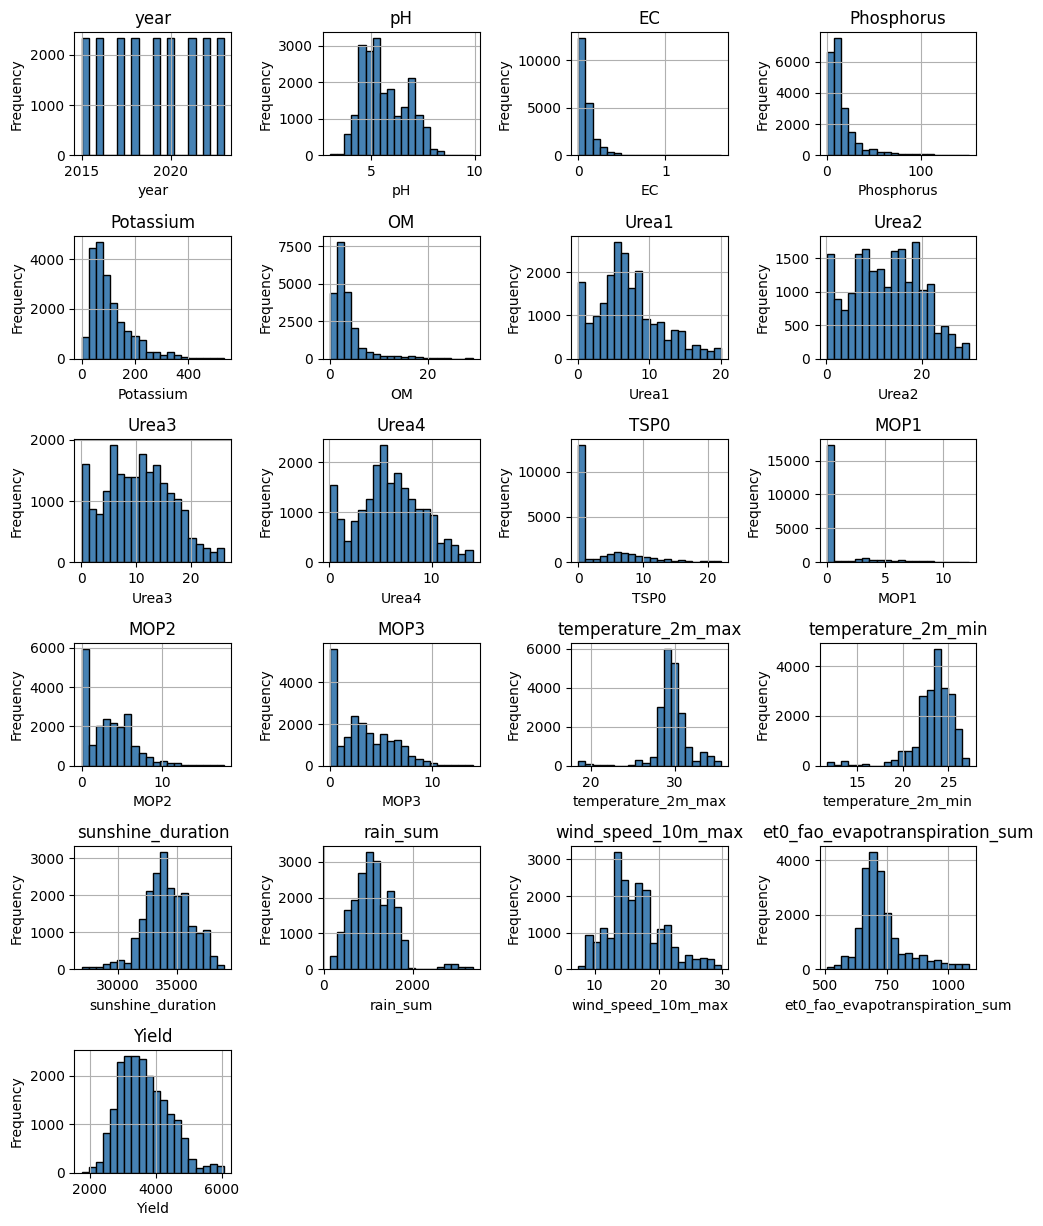

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def showdist():
    numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])
    plt.figure(figsize=(10, 16))
    for i, col in enumerate(numerical_columns):
        plt.subplot(8, 4, i + 1)  # Fixed grid of 3x3
        final_combined_data_cleaned[col].hist(bins=20, color='steelblue', edgecolor='black')
        plt.title(f'{col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


final_combined_data_cleaned = final_combined_data_cleaned.drop(['wind_direction_10m_dominant','wind_gusts_10m_max','precipitation_hours','daylight_duration','shortwave_radiation_sum', 'temperature_2m_mean', 'Sown'], axis=1)

showdist()

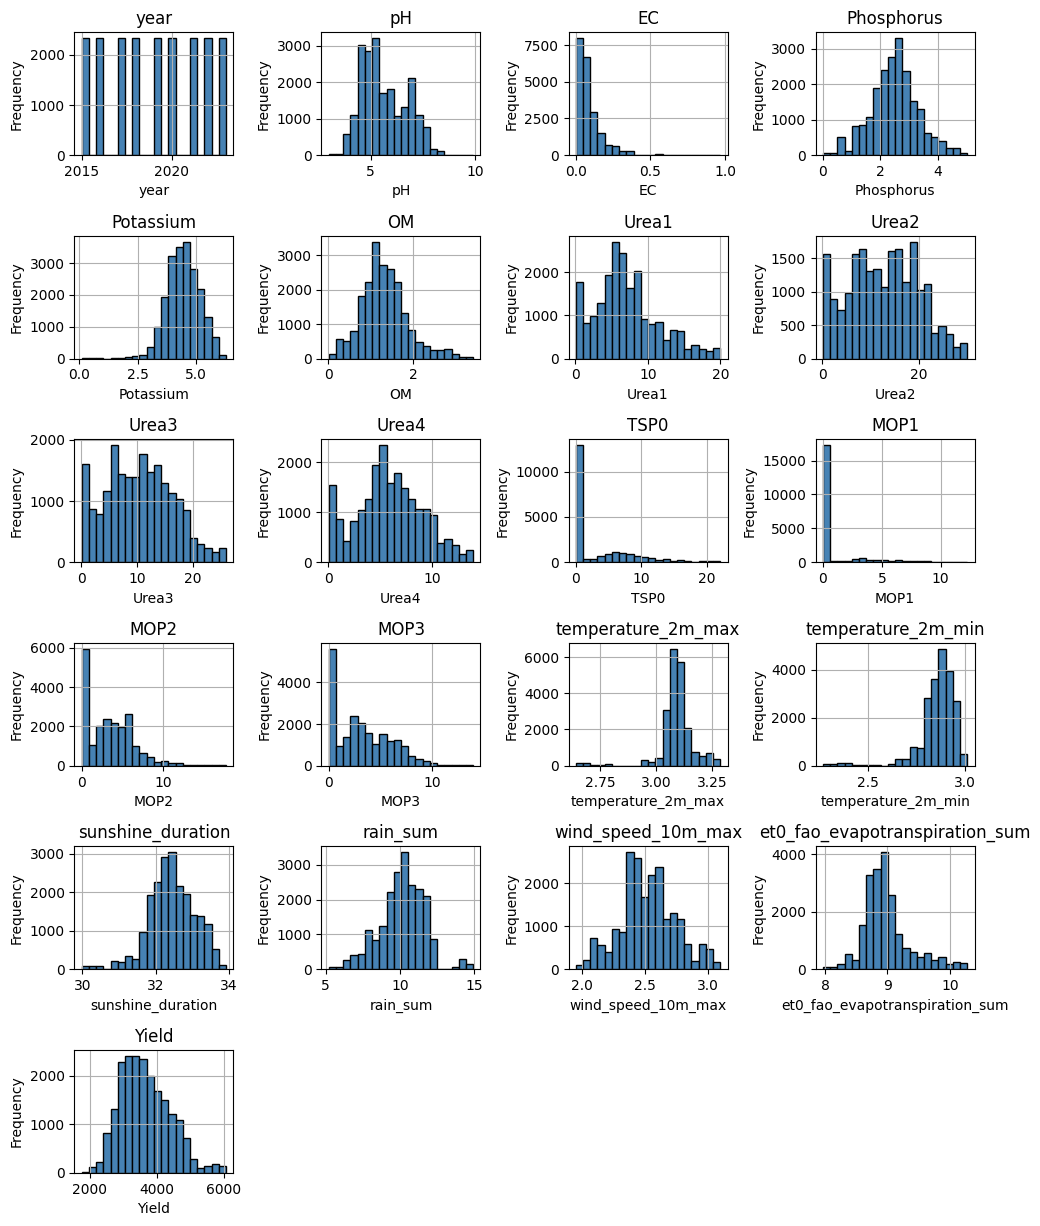

In [16]:
import numpy as np 

final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

showdist()


In [17]:
# numerical_columns = final_combined_data_cleaned.select_dtypes(include=[float, int])

# plt.figure(figsize=(10, 16))
# for i, col in enumerate(numerical_columns):
#     plt.subplot(8, 4, i + 1)  
#     sns.boxplot(y=final_combined_data_cleaned[col], color='lightblue')
#     plt.title(f'{col} Boxplot')
# plt.tight_layout()
# plt.show()

##### Distribution of Target Variable (Yield): Plot the distribution of the target variable (Yield) to understand its skewness or potential outliers

### Corela

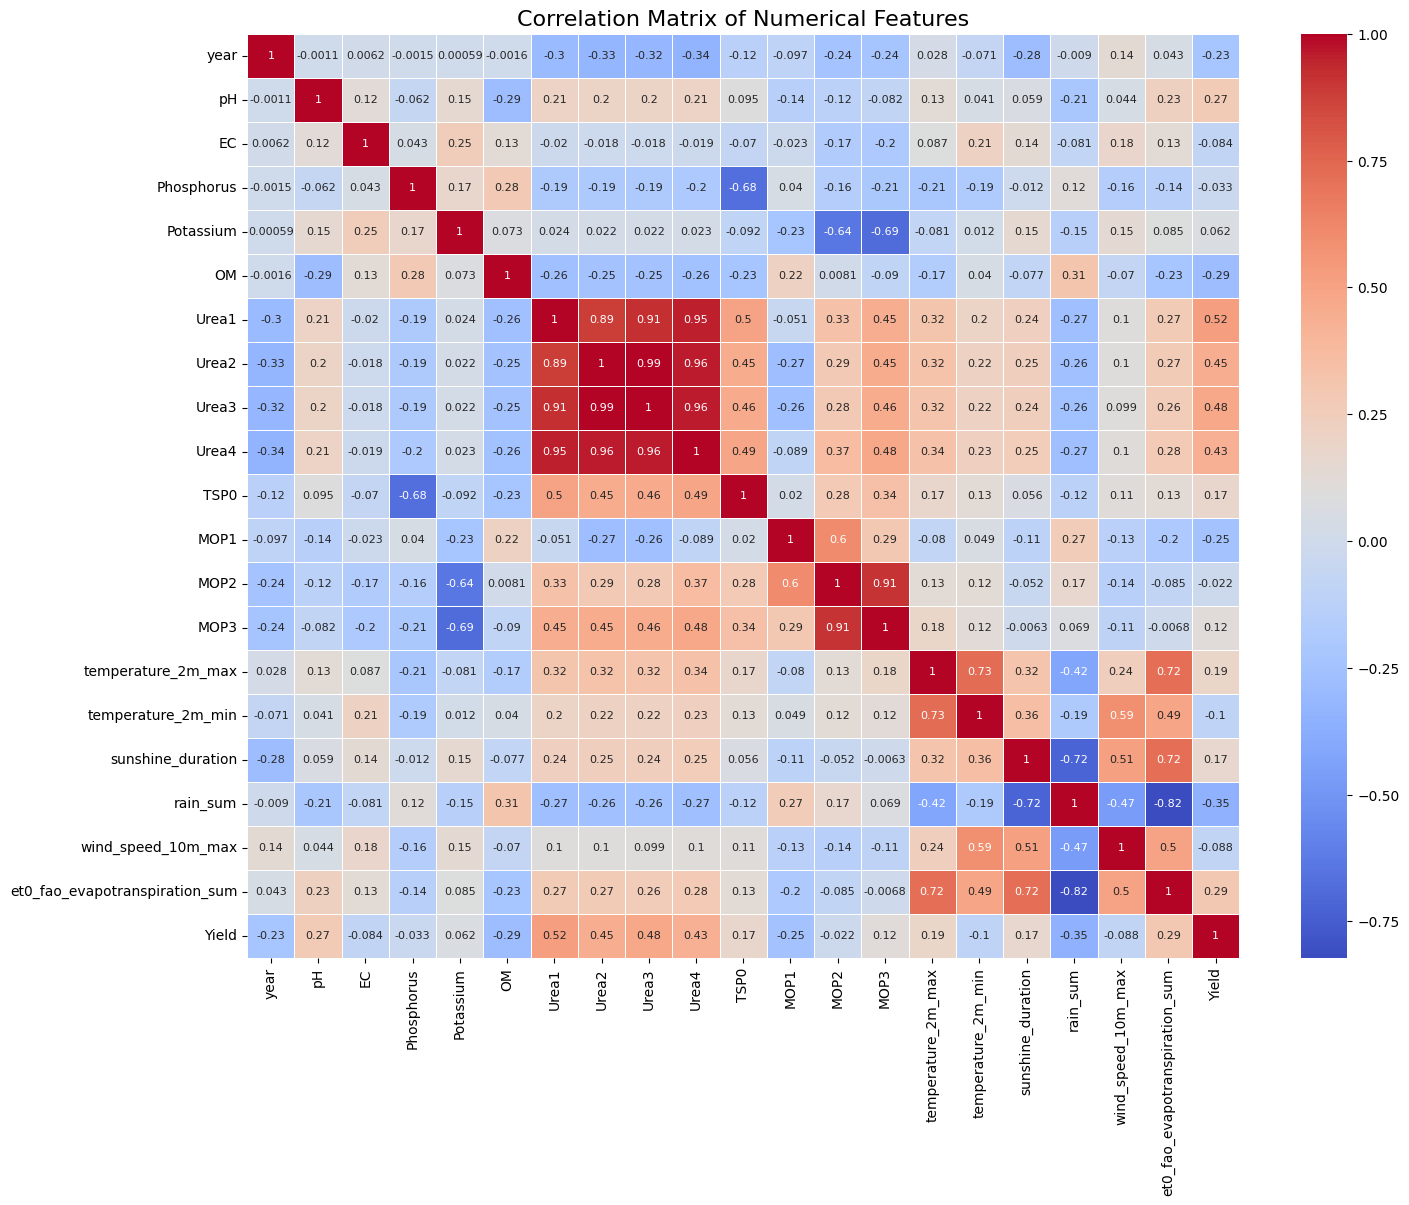

In [18]:
import numpy as np

# Selecting only the numeric columns
numeric_data = final_combined_data_cleaned.select_dtypes(include=[np.number])

# Now calculate the correlation matrix
correlation_matrix = numeric_data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Re-generate the heatmap with improved clarity
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [19]:
# final_combined_data_cleaned.groupby(['year', 'season'])['Yield'].mean().plot(kind='line', title='Average Yield Over Seasons')

### Experimenting with multiple hidden layers and perceptrons

Trial 90 Complete [00h 00m 48s]
val_mean_absolute_error: 0.36419519782066345

Best val_mean_absolute_error So Far: 0.1544288843870163
Total elapsed time: 00h 19m 36s

The optimal number of layers: 2
The optimal number of units in each layer: [32, 32]
The optimal activation function: tanh
The optimal dropout rate: 0.4
The optimal optimizer: adam
The optimal learning rate: 0.007775645935042448

Epoch 1/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8168 - mean_absolute_error: 0.6494 - val_loss: 0.2688 - val_mean_absolute_error: 0.3969
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2941 - mean_absolute_error: 0.4170 - val_loss: 0.1955 - val_mean_absolute_error: 0.3391
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2530 - mean_absolute_error: 0.3855 - val_loss: 0.1901 - val_mean_absolute_error: 0.3243
Epoch 4/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2177 - mean_absolute_error: 0.3587 - val_loss: 0.1552 - val_mean_absolute_error: 0.2960
Epoc

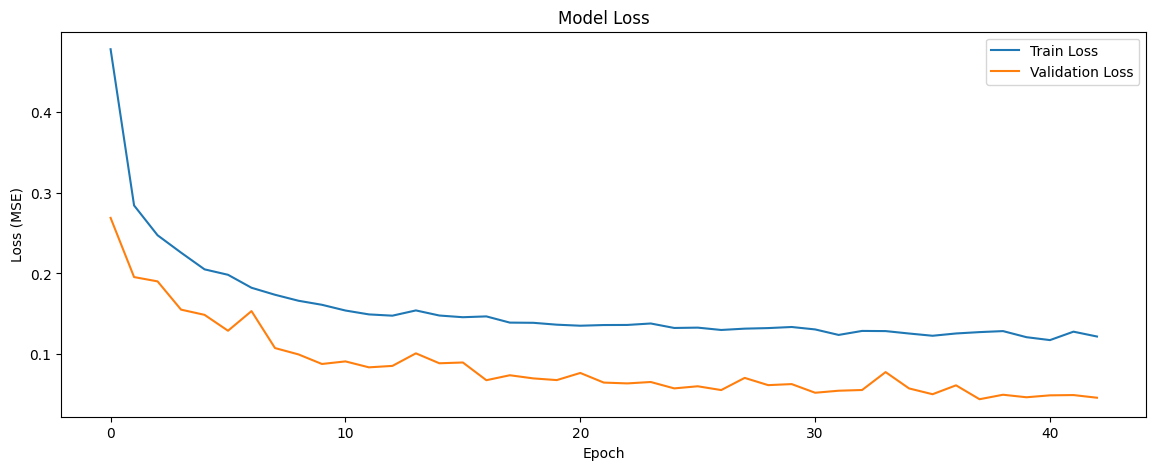

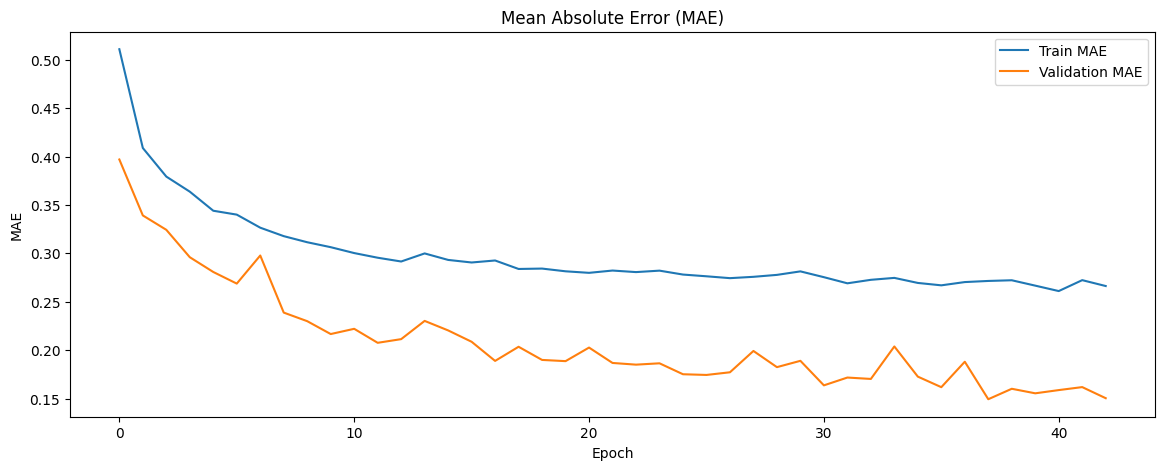

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras_tuner as kt

# Load and preprocess your dataset
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
# Apply transformations to specific columns
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM',  'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 'temperature_2m_max', 'temperature_2m_min', 'sunshine_duration', 
            'rain_sum', 'wind_speed_10m_max', 'et0_fao_evapotranspiration_sum', 'Season']

features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]) 

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Scale the features and target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # Define the first layer with input dimension
    model.add(Dense(units=hp.Int('units_0', min_value=16, max_value=48, step=16),
                    activation=hp.Choice('activation', values=['relu', 'tanh']),
                    input_dim=X_train.shape[1]))
    
    # Add additional layers if needed
    for i in range(1, hp.Int('num_layers', 1, 2)):  # Up to 2 layers total
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=16, max_value=48, step=16),
                        activation=hp.Choice('activation', values=['relu', 'tanh'])))
        model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1))  # Output layer for regression

    # Configure the optimizer and learning rate
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    
    if hp_optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        optimizer = SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Define Keras Tuner with Hyperband search for efficiency
tuner = kt.Hyperband(
    build_model,
    objective='val_mean_absolute_error',
    max_epochs=50,
    factor=3,
    directory='keras_tuner_dir',
    project_name='tune_yield_prediction'
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of layers: {best_hps.get('num_layers')}
The optimal number of units in each layer: {[best_hps.get(f'units_{i}') for i in range(best_hps.get('num_layers'))]}
The optimal activation function: {best_hps.get('activation')}
The optimal dropout rate: {best_hps.get('dropout')}
The optimal optimizer: {best_hps.get('optimizer')}
The optimal learning rate: {best_hps.get('learning_rate')}
""")


best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks=[early_stopping])

plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()


### For high layer count

Epoch 1/100


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0352 - mean_absolute_error: 0.7572 - val_loss: 0.3649 - val_mean_absolute_error: 0.4535 - learning_rate: 0.0078
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4029 - mean_absolute_error: 0.4858 - val_loss: 0.2967 - val_mean_absolute_error: 0.4169 - learning_rate: 0.0078
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3611 - mean_absolute_error: 0.4626 - val_loss: 0.2638 - val_mean_absolute_error: 0.3886 - learning_rate: 0.0078
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3365 - mean_absolute_error: 0.4463 - val_loss: 0.2531 - val_mean_absolute_error: 0.3790 - learning_rate: 0.0078
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3298 - mean_absolute_error: 0.4406 - val_loss: 0.2512 - val_mean_absolute_error: 0.3837 - learning_rate: 0.0078
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3230 - mean_absolute_error: 0.4361 - val_loss: 0.2259 - val_mean_absolute_

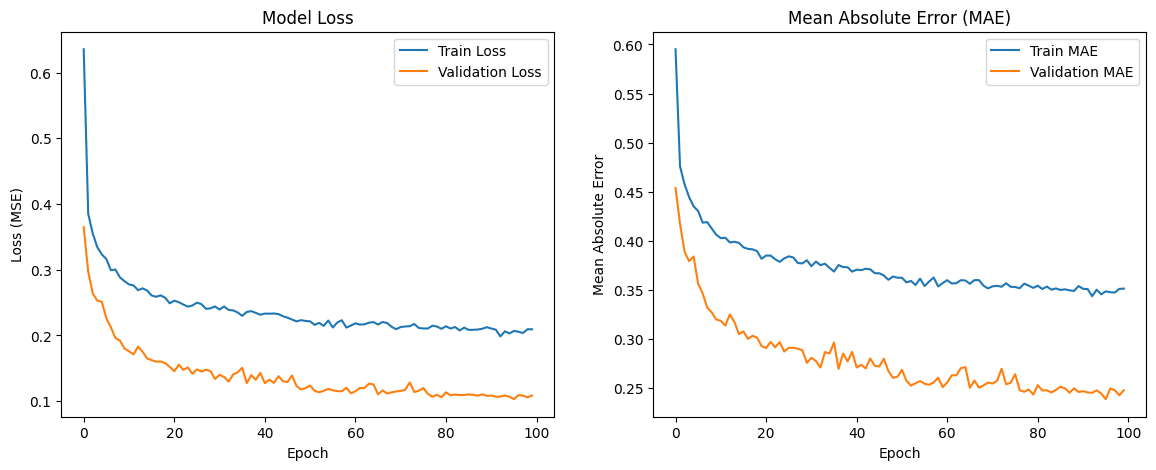

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD

final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 
            'wind_speed_10m_max', 
            'et0_fao_evapotranspiration_sum', 
            'Season']


features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]) 

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert data to float32 for Keras
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Build the MLP model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(1))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.007775645935042448), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Add Early Stopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Plotting the loss and MAE (mean absolute error)
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

# Plot MAE (as a measure of error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')

plt.show()

525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train RMSE: 224.8140
Test RMSE: 235.9697
Train R^2: 0.9065
Test R^2: 0.8975
Train MAE: 167.6663
Test MAE: 175.1970
Train MAPE: 4.82%
Test MAPE: 5.07%


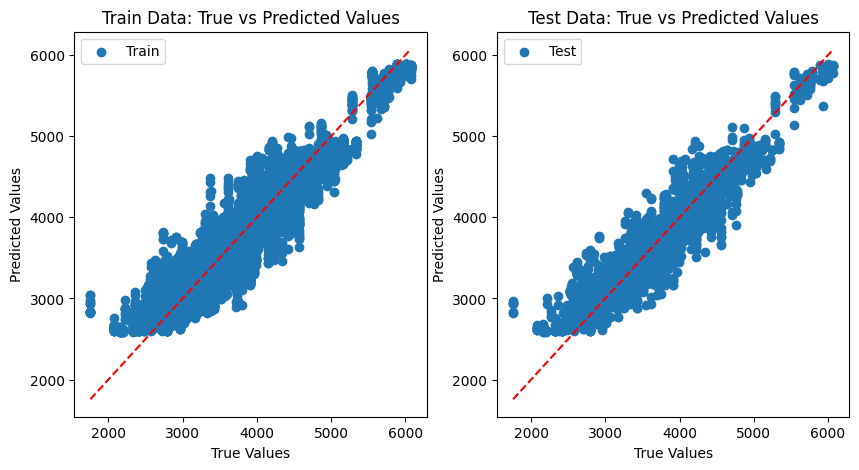

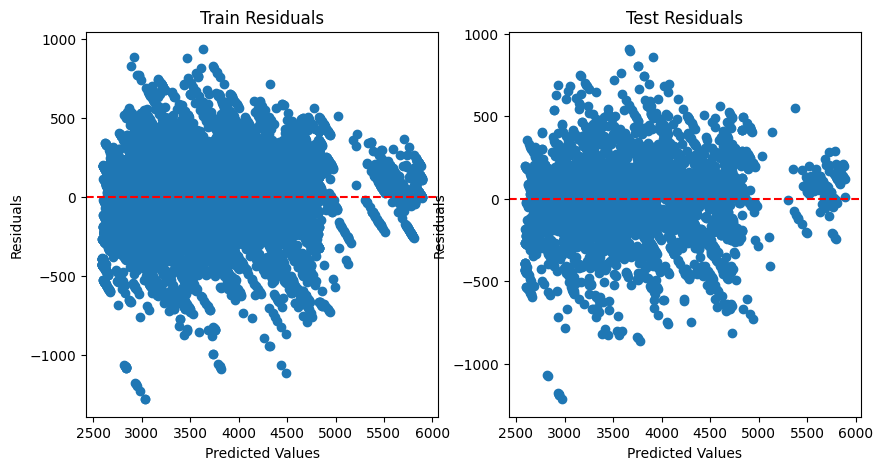

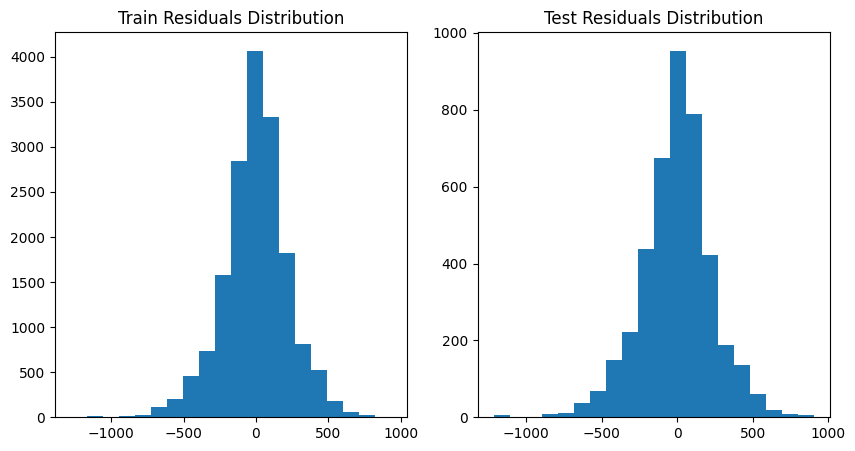

In [39]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse transform the scaled predictions and true values
y_train_pred_rescaled = y_scaler.inverse_transform(y_train_pred)
y_test_pred_rescaled = y_scaler.inverse_transform(y_test_pred)
y_train_rescaled = y_scaler.inverse_transform(y_train)
y_test_rescaled = y_scaler.inverse_transform(y_test)

# Calculate RMSE for training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train_rescaled, y_train_pred_rescaled))
rmse_test = np.sqrt(mean_squared_error(y_test_rescaled, y_test_pred_rescaled))
mae_train = mean_absolute_error(y_train_rescaled, y_train_pred_rescaled)
mae_test = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)
mape_train = np.mean(np.abs((y_train_rescaled - y_train_pred_rescaled) / y_train_rescaled)) * 100
mape_test = np.mean(np.abs((y_test_rescaled - y_test_pred_rescaled) / y_test_rescaled)) * 100

# Calculate R^2 score for training and testing data
r2_train = r2_score(y_train_rescaled, y_train_pred_rescaled)
r2_test = r2_score(y_test_rescaled, y_test_pred_rescaled)

# Print evaluation results
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Train R^2: {r2_train:.4f}")
print(f"Test R^2: {r2_test:.4f}")
print(f"Train MAE: {mae_train:.4f}")
print(f"Test MAE: {mae_test:.4f}")
print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")


# Plot predictions vs true values for training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_rescaled, y_train_pred_rescaled, label='Train')
plt.plot([y_train_rescaled.min(), y_train_rescaled.max()], [y_train_rescaled.min(), y_train_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Train Data: True vs Predicted Values')
plt.legend()

# Plot predictions vs true values for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_rescaled, y_test_pred_rescaled, label='Test')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: True vs Predicted Values')
plt.legend()

plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_rescaled, y_train_rescaled - y_train_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Train Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_rescaled, y_test_rescaled - y_test_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Residuals')

plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train_rescaled - y_train_pred_rescaled, bins=20)
plt.title('Train Residuals Distribution')

plt.subplot(1, 2, 2)
plt.hist(y_test_rescaled - y_test_pred_rescaled, bins=20)
plt.title('Test Residuals Distribution')

plt.show()

In [ ]:

weights_biases = model.layers[0].get_weights()
weights = weights_biases[0]  
biases = weights_biases[1]   


import pandas as pd

neuron_columns = [f'Neuron{i+1}' for i in range(32)]
weight_df = pd.DataFrame(weights, columns=neuron_columns)
weight_df['Feature'] = features  
weight_df.set_index('Feature', inplace=True)

print("Weights from the first layer:")
print(weight_df)

threshold = 0.1

near_zero_weights = weight_df[(weight_df.abs() < threshold).all(axis=1)]

print("\nFeatures with near-zero weights across all neurons:")
print(near_zero_weights.index.tolist())

Weights from the first layer:
                                 Neuron1   Neuron2   Neuron3   Neuron4  \
Feature                                                                  
year                            1.433854 -0.623719  0.808733 -0.757402   
pH                              0.265661  0.046505 -0.028056 -0.086549   
EC                             -0.203253 -0.008483 -0.053197  0.150759   
Phosphorus                      1.107384 -0.081795  0.030504 -0.112660   
Potassium                      -0.197973 -0.027039 -0.376664 -0.356033   
OM                              0.432673  0.265587  0.220196 -0.322311   
Urea1                           2.262956  0.055647 -1.301957  0.689293   
Urea2                          -0.144224 -0.576798  0.898790  0.183385   
Urea3                           0.400132 -0.949146  0.668885  0.213904   
Urea4                           0.357336 -0.486291 -0.669330 -0.292617   
TSP0                            1.405418 -0.478722 -0.409602  0.050158   
MOP1    

In [ ]:

for i, layer in enumerate(model.layers[1:], start=1): 
    weights_biases = layer.get_weights()
    
    # Only proceed if the layer has weights
    if weights_biases:  
        weights = weights_biases[0]  # Weights of the layer
        
        
        if weights.ndim == 2:  # 2D weights (e.g., Dense layer)
            neuron_columns = [f'Neuron{j+1}' for j in range(weights.shape[1])]  # Neurons in the current layer
            weight_df = pd.DataFrame(weights, columns=neuron_columns)

            if i == 1:
                weight_df['Feature'] = features
                weight_df.set_index('Feature', inplace=True)

            # Display weights for the current layer
            print(f"\nWeights from layer {i} ({layer.name}):")
            print(weight_df)

            threshold = 0.1

            # Finding the features where all weights across the neurons are below the threshold
            near_zero_weights = weight_df[(weight_df.abs() < threshold).all(axis=1)]

            # List of Features with Near-Zero Weights
            print(f"\nFeatures with near-zero weights across all neurons in layer {i}:")
            print(near_zero_weights.index.tolist())
        
        elif weights.ndim == 1:  # 1D weights (e.g., biases)
            print(f"\nLayer {i} ({layer.name}) has 1D weights (biases):")
            print(weights)
        else:
            print(f"\nLayer {i} ({layer.name}) has weights of unexpected shape: {weights.shape}")
    else:
        print(f"\nLayer {i} ({layer.name}) has no weights.")



Layer 1 (batch_normalization_10) has 1D weights (biases):
[0.7741617  0.78603584 0.6407     0.9350594  0.54353267 1.0784564
 1.0263053  0.6756605  0.61932313 0.7732686  0.6514808  0.8224032
 0.56789035 0.8989511  0.5836324  0.91923094 0.67910403 0.6911832
 0.6177278  0.6324262  0.83964604 0.6877215  0.61072475 0.7216457
 0.7577717  1.1369317  0.6166859  1.7738457  0.64970917 0.8941918
 0.72128284 0.7322536 ]

Layer 2 (dropout_10) has no weights.

Weights from layer 3 (dense_19):
     Neuron1   Neuron2   Neuron3   Neuron4   Neuron5   Neuron6   Neuron7  \
0   0.226833  0.466484  0.108215 -1.691851 -0.220756 -0.201340  0.496582   
1   0.072719  0.215988 -0.162067  0.102869 -0.194630 -0.560745 -1.984436   
2   0.174010  0.829622  0.098306  1.445243  0.486190  0.234371 -0.154262   
3  -0.964770 -0.601823  1.455366 -0.238434 -0.225156  0.601853  1.145532   
4  -0.215027  0.173975  0.366203 -0.306836 -1.252639 -0.506261  0.169098   
5  -0.951796 -0.935481  0.607015 -1.680326  0.147269  0.297

Layer: dense_18
Total Weights for dense_18: 768
Weights: (23, 32)
Weights:
[[ 1.43385446e+00 -6.23719394e-01  8.08733463e-01 -7.57401645e-01
  -1.18034817e-01  8.07020366e-01  5.06947041e-01  2.10637712e+00
  -7.87827313e-01 -2.09370184e+00  8.87935221e-01  1.26253188e+00
  -1.18295741e+00  1.19590700e+00 -1.62807360e-01  3.93978328e-01
   1.17911398e-01  1.47202146e+00  1.16568148e+00  1.31840658e+00
   1.29043078e+00 -6.36074662e-01 -2.15453219e+00 -3.17373574e-01
  -5.92350662e-01  1.19654930e+00 -1.11722663e-01  3.92961800e-01
   4.93855143e+00  3.09083283e-01  1.89996088e+00 -3.79872829e-01]
 [ 2.65661210e-01  4.65045944e-02 -2.80564707e-02 -8.65493268e-02
  -4.50540781e-01  1.88268229e-01 -1.74783841e-01 -3.71675313e-01
  -1.95998341e-01  2.54767776e-01  8.93460155e-01  8.82862657e-02
  -4.33144420e-01 -2.37366576e-02 -8.95390093e-01  5.55703402e-01
   1.19150436e+00  4.58845079e-01  8.55948746e-01  1.10143833e-02
  -1.42473355e-01 -3.68941985e-02  2.94634581e-01 -1.06047201e+00


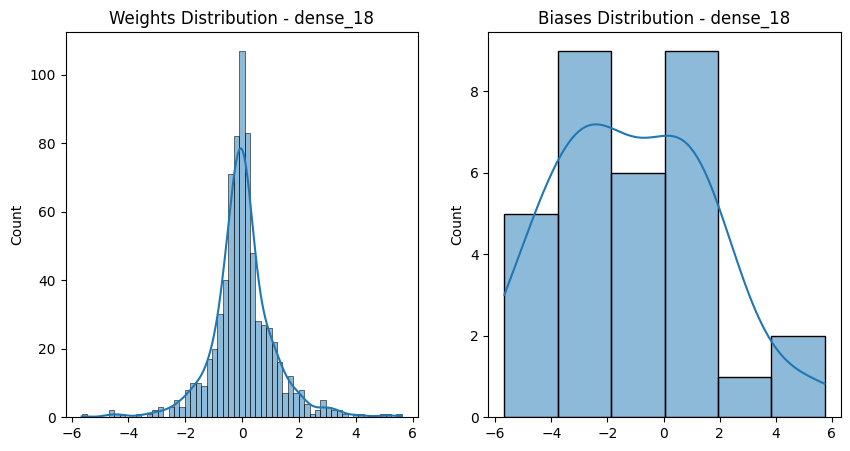

Layer: batch_normalization_10


<Figure size 1000x500 with 0 Axes>

Layer dropout_10 has no weights or biases.
Layer: dense_19
Total Weights for dense_19: 1056
Weights: (32, 32)
Weights:
[[ 2.2683264e-01  4.6648362e-01  1.0821489e-01 ...  7.4510939e-02
  -1.8802999e-01  1.0132766e+00]
 [ 7.2719216e-02  2.1598819e-01 -1.6206652e-01 ... -1.1380691e-01
   2.0392837e-02 -1.0681281e-01]
 [ 1.7400961e-01  8.2962215e-01  9.8306395e-02 ... -8.0814399e-02
   2.6602736e-01 -1.3309070e-01]
 ...
 [ 5.8395287e-04 -6.2331879e-01  1.9628280e-01 ... -1.1532145e+00
   1.0709059e+00  3.3724743e-01]
 [ 7.8857273e-02  4.1756593e-02 -4.6399826e-01 ... -5.4035008e-02
  -9.9043351e-01 -3.2800016e-01]
 [-1.0261283e+00 -1.9350023e+00  1.2174622e+00 ... -6.3846774e-02
   9.5540500e-01 -6.8719858e-01]]
Biases: (32,)
Biases:
[ 7.5529397e-02 -5.5823646e-02  2.3639084e-01  5.6011684e-02
  2.1700040e-01  3.2265563e+00  2.1706400e+00 -4.8483725e+00
 -3.4420588e+00  1.3446547e-01  3.0461085e+00  1.7197566e-02
  3.7944173e-03 -1.7181949e-01  2.1704824e+00 -2.4442713e+00
 -1.4714967e+00

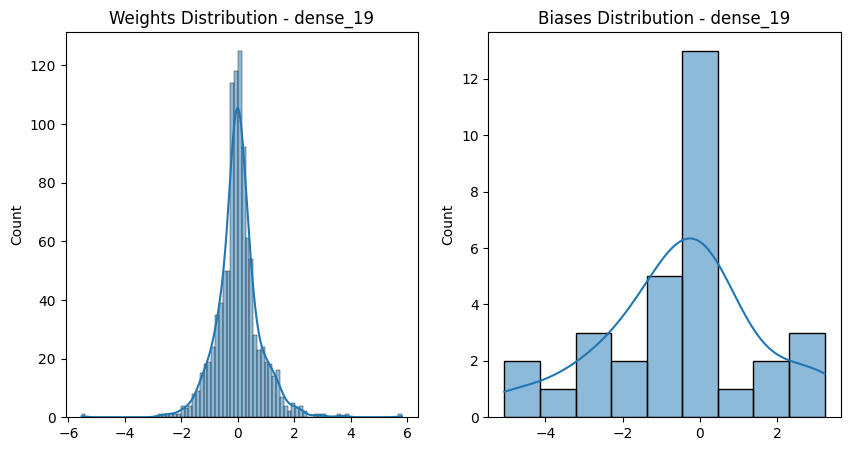

Layer: batch_normalization_11


<Figure size 1000x500 with 0 Axes>

Layer dropout_11 has no weights or biases.
Layer: dense_20
Total Weights for dense_20: 33
Weights: (32, 1)
Weights:
[[-0.12217217]
 [-0.1261409 ]
 [ 0.12200358]
 [-0.12583198]
 [-0.13588579]
 [-0.12844354]
 [ 0.12462465]
 [ 0.1546973 ]
 [ 0.13492997]
 [ 0.12927833]
 [ 0.11031938]
 [-0.13525864]
 [-0.1308227 ]
 [ 0.12136828]
 [-0.13683733]
 [ 0.12711793]
 [ 0.12095343]
 [-0.11002538]
 [-0.1288715 ]
 [-0.12436153]
 [ 0.12931737]
 [-0.11700906]
 [ 0.12653586]
 [ 0.13022478]
 [ 0.13229457]
 [-0.12422743]
 [ 0.15541995]
 [-0.14152838]
 [-0.12707715]
 [-0.1237632 ]
 [ 0.12720263]
 [ 0.12251479]]
Biases: (1,)
Biases:
[0.0136409]



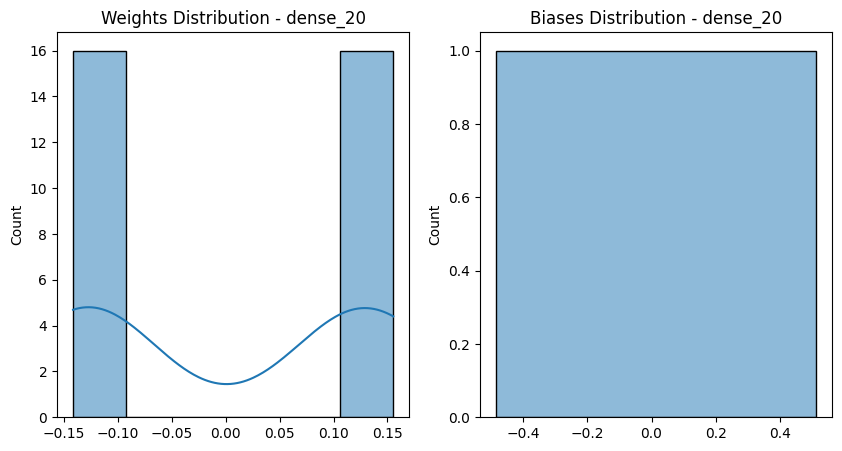


Total Count of Weights in the Model: 1857


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize a variable to store the total count of weights across the entire model
total_weights_count = 0

for layer in model.layers:
    weights_biases = layer.get_weights()
    
    if len(weights_biases) > 0:  
        plt.figure(figsize=(10, 5))
        print(f"Layer: {layer.name}")
        
        if 'dense' in layer.name:  
            weights, biases = weights_biases        
            
            # Count total weights and biases
            layer_weights_count = np.prod(weights.shape) + np.prod(biases.shape)
            total_weights_count += layer_weights_count
            
            print(f"Total Weights for {layer.name}: {layer_weights_count}")
            print(f"Weights: {weights.shape}")
            print(f"Weights:\n{weights}")
            print(f"Biases: {biases.shape}")
            print(f"Biases:\n{biases}\n")
            
            # Plot weight distribution
            plt.subplot(1, 2, 1)
            sns.histplot(weights.flatten(), kde=True)
            plt.title(f'Weights Distribution - {layer.name}')
            
            # Plot bias distribution
            plt.subplot(1, 2, 2)
            sns.histplot(biases.flatten(), kde=True)
            plt.title(f'Biases Distribution - {layer.name}')
            
        elif len(weights_biases) == 1:  # If there's only one set of weights
            weights = weights_biases[0]
            
            # Count total weights
            layer_weights_count = np.prod(weights.shape)
            total_weights_count += layer_weights_count
            
            print(f"Total Weights for {layer.name}: {layer_weights_count}")
            print(f"Weights: {weights.shape}")
            print(f"Weights:\n{weights}\n")
            
            # Plot weight distribution
            sns.histplot(weights.flatten(), kde=True)
            plt.title(f'Weights Distribution - {layer.name}')
        
        plt.show()
    
    else:
        print(f"Layer {layer.name} has no weights or biases.")

# Print the total count of weights in the entire model
print(f"\nTotal Count of Weights in the Model: {total_weights_count}")


###?

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import joblib  # For saving scalers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model

# Load and preprocess data (as in your code)
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
# Apply transformations
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

# One-hot encoding for Condition
final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Define features and target
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 'wind_speed_10m_max', 'et0_fao_evapotranspiration_sum', 'Season']
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')])

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Scale the features and target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build and compile the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(48, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.00125), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Save the scalers
joblib.dump(scaler, 'X_scaler.pkl')
joblib.dump(y_scaler, 'y_scaler.pkl')

# Save the model
model.save('trained_model.h5')

# Plotting the loss and MAE
plt.figure(figsize=(14, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

# Mean Absolute Error
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')

plt.show()


### Test

In [ ]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model

# Load the saved model and scalers
model = load_model('trained_model.h5')
scaler = joblib.load('X_scaler.pkl')
y_scaler = joblib.load('y_scaler.pkl')

# Define transformations on new data for testing
def preprocess_input(input_data):
    # Apply the transformations used in training
    input_data['Phosphorus'] = np.log1p(input_data['Phosphorus'])
    input_data['Potassium'] = np.log1p(input_data['Potassium'])
    input_data['OM'] = np.log1p(input_data['OM'])
    input_data['EC'] = np.log1p(input_data['EC'])
    input_data['temperature_2m_max'] = np.cbrt(input_data['temperature_2m_max'])
    input_data['temperature_2m_min'] = np.cbrt(input_data['temperature_2m_min'])
    input_data['rain_sum'] = np.cbrt(input_data['rain_sum'])
    input_data['sunshine_duration'] = np.cbrt(input_data['sunshine_duration'])
    input_data['wind_speed_10m_max'] = np.cbrt(input_data['wind_speed_10m_max'])
    input_data['et0_fao_evapotranspiration_sum'] = np.cbrt(input_data['et0_fao_evapotranspiration_sum'])
    return input_data

# Define test data (adjust values to match your input data format)
test_data = {
    'year': 2024, 
    'pH': 6.5, 
    'EC': 0.08, 
    'Phosphorus': 25.0, 
    'Potassium': 150.0, 
    'OM': 3.0,
    'temperature_2m_max': 30.5, 
    'temperature_2m_min': 22.3, 
    'sunshine_duration': 35000,
    'rain_sum': 200, 
    'wind_speed_10m_max': 12.5, 
    'et0_fao_evapotranspiration_sum': 400,
    'Urea1': 20, 
    'Urea2': 30, 
    'Urea3': 26, 
    'Urea4': 14, 
    'TSP0': 0, 
    'MOP1': 20, 'MOP2': 15, 
    'MOP3': 12, 
    'Season': 1, 
    'Condition_Rain': 1, 
    'Condition_Tank': 0
}

# Convert to DataFrame for easier manipulation
test_df = pd.DataFrame([test_data])

# Preprocess the test data
test_df = preprocess_input(test_df)

# Ensure all features are present (fill missing one-hot encoded columns with 0)
required_features = scaler.get_feature_names_out()
for feature in required_features:
    if feature not in test_df.columns:
        test_df[feature] = 0

# Scale the test data
X_test_scaled = scaler.transform(test_df[required_features])

# Make predictions
predicted_scaled_yield = model.predict(X_test_scaled)
predicted_yield = y_scaler.inverse_transform(predicted_scaled_yield)

# Print the predicted yield
print(f"Predicted Yield: {predicted_yield[0][0]:.2f}")


### Add noise

Epoch 1/100


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0468 - mean_absolute_error: 0.7560 - val_loss: 0.3733 - val_mean_absolute_error: 0.4587 - learning_rate: 0.0078
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4390 - mean_absolute_error: 0.5045 - val_loss: 0.3376 - val_mean_absolute_error: 0.4402 - learning_rate: 0.0078
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3903 - mean_absolute_error: 0.4746 - val_loss: 0.3097 - val_mean_absolute_error: 0.4177 - learning_rate: 0.0078
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3761 - mean_absolute_error: 0.4698 - val_loss: 0.3019 - val_mean_absolute_error: 0.4140 - learning_rate: 0.0078
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3530 - mean_absolute_error: 0.4547 - val_loss: 0.2824 - val_mean_absolute_error: 0.4001 - learning_rate: 0.0078
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3542 - mean_absolute_error: 0.4551 - val_loss: 0.2613 - val_mean_absolute_

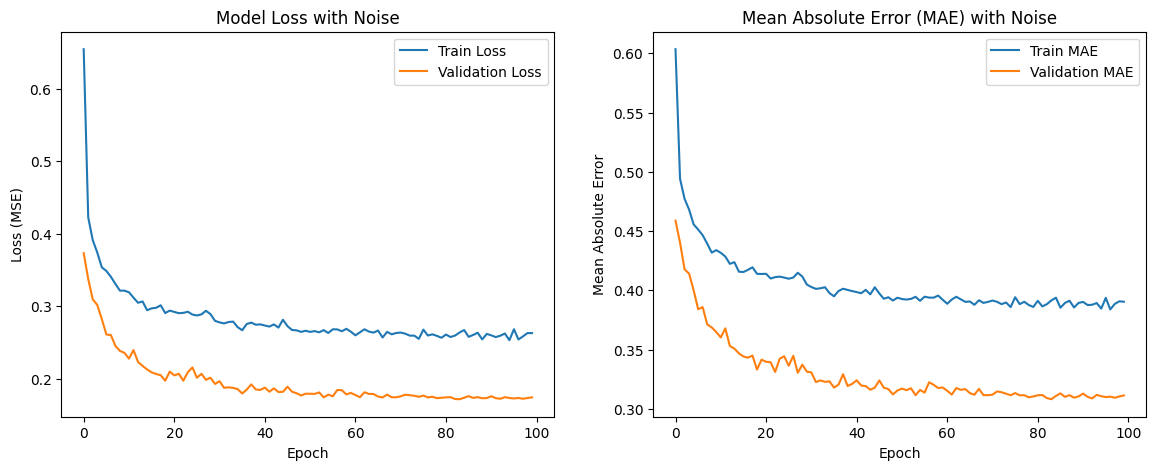

In [43]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the data
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Feature selection
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM',
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 
            'wind_speed_10m_max', 
            'et0_fao_evapotranspiration_sum', 
            'Season']
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]) 

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Adding 20% noise to the features
noise_factor = 0.2
X_noisy = X + noise_factor * X.std().values * np.random.randn(*X.shape)


# Standardize features and target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_noisy)  # Using the noisy features
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert data to float32 for Keras
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Build the MLP model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(1))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.007775645935042448), loss='mean_squared_error', metrics=['mean_absolute_error'])


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

# Train the model with noisy data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Plotting the loss and MAE (mean absolute error)
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Noise')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

# Plot MAE (as a measure of error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE) with Noise')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')

plt.show()


### Gaussian noise -20%

Epoch 1/100


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1706 - mean_absolute_error: 0.7977 - val_loss: 0.3688 - val_mean_absolute_error: 0.4653 - learning_rate: 0.0078
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4301 - mean_absolute_error: 0.4971 - val_loss: 0.3083 - val_mean_absolute_error: 0.4123 - learning_rate: 0.0078
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4048 - mean_absolute_error: 0.4849 - val_loss: 0.2886 - val_mean_absolute_error: 0.4012 - learning_rate: 0.0078
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3784 - mean_absolute_error: 0.4675 - val_loss: 0.2644 - val_mean_absolute_error: 0.3867 - learning_rate: 0.0078
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3555 - mean_absolute_error: 0.4543 - val_loss: 0.2514 - val_mean_absolute_error: 0.3737 - learning_rate: 0.0078
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3479 - mean_absolute_error: 0.4503 - val_loss: 0.2394 - val_mean_absolute_

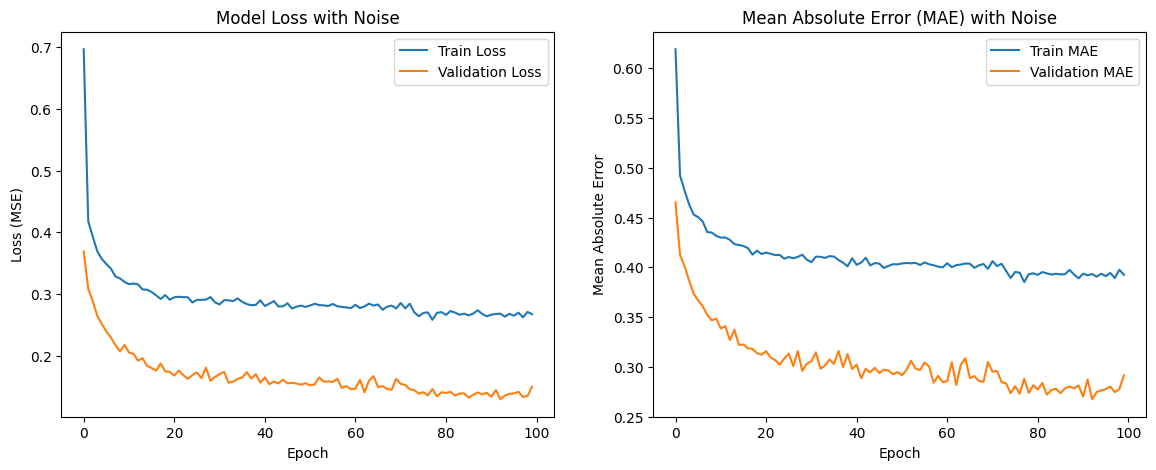

In [44]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the data
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Feature selection
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 
            'wind_speed_10m_max', 
            'et0_fao_evapotranspiration_sum', 
            'Season']
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]) 

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Adding 20% noise to the features
noise_factor = 0.0
X_noisy = X + noise_factor * X.std().values * np.random.randn(*X.shape)


# Standardize features and target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_noisy)  # Using the noisy features
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert data to float32 for Keras
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

from tensorflow.keras.layers import GaussianNoise

model = Sequential([
    GaussianNoise(0.2, input_shape=(X_train.shape[1],)),
    Dense(32, activation='tanh'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='tanh'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1)
])


model.compile(optimizer=Adam(learning_rate=0.007775645935042448), loss='mean_squared_error', metrics=['mean_absolute_error'])


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

# Train the model with noisy data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Plotting the loss and MAE (mean absolute error)
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Noise')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

# Plot MAE (as a measure of error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE) with Noise')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')

plt.show()


### Gaussian noise -5%

Epoch 1/100


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.1781 - mean_absolute_error: 0.8016 - val_loss: 0.3692 - val_mean_absolute_error: 0.4568 - learning_rate: 0.0078
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4141 - mean_absolute_error: 0.4926 - val_loss: 0.3039 - val_mean_absolute_error: 0.4136 - learning_rate: 0.0078
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3689 - mean_absolute_error: 0.4648 - val_loss: 0.2809 - val_mean_absolute_error: 0.4006 - learning_rate: 0.0078
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3552 - mean_absolute_error: 0.4567 - val_loss: 0.2515 - val_mean_absolute_error: 0.3791 - learning_rate: 0.0078
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3240 - mean_absolute_error: 0.4369 - val_loss: 0.2317 - val_mean_absolute_error: 0.3633 - learning_rate: 0.0078
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3172 - mean_absolute_error: 0.4331 - val_loss: 0.2339 - val_mean_absolute_

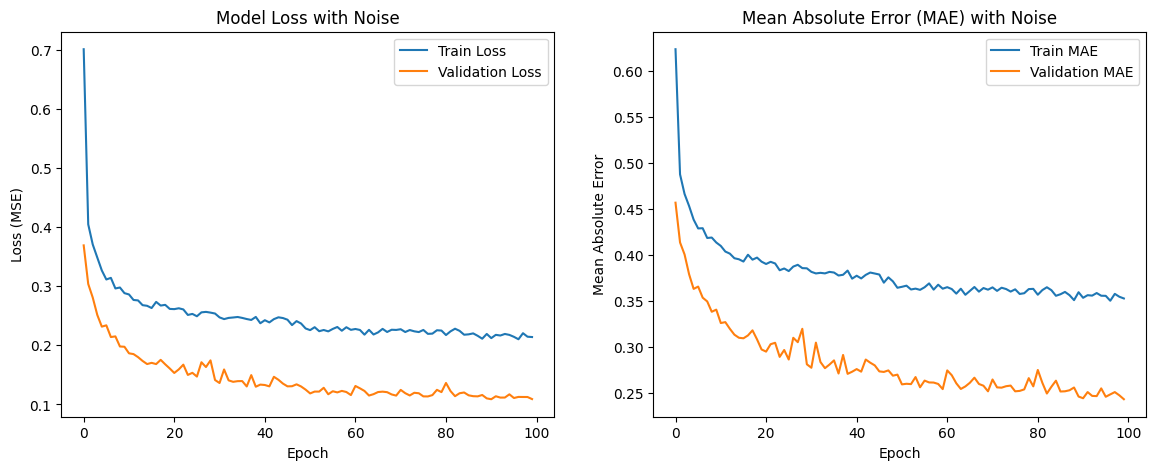

In [45]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the data
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Feature selection
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 
            'wind_speed_10m_max', 
            'et0_fao_evapotranspiration_sum', 
            'Season']
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]) 

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Adding 20% noise to the features
noise_factor = 0.0
X_noisy = X + noise_factor * X.std().values * np.random.randn(*X.shape)


# Standardize features and target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_noisy)  # Using the noisy features
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert data to float32 for Keras
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

from tensorflow.keras.layers import GaussianNoise

model = Sequential([
    GaussianNoise(0.05, input_shape=(X_train.shape[1],)),
    Dense(32, activation='tanh'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='tanh'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.007775645935042448), loss='mean_squared_error', metrics=['mean_absolute_error'])


# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

# Train the model with noisy data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Plotting the loss and MAE (mean absolute error)
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Noise')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

# Plot MAE (as a measure of error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE) with Noise')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')

plt.show()


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\regularization\gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.0710 - mean_absolute_error: 0.7614 - val_loss: 0.3316 - val_mean_absolute_error: 0.4346 - learning_rate: 0.0078
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4014 - mean_absolute_error: 0.4855 - val_loss: 0.2996 - val_mean_absolute_error: 0.4152 - learning_rate: 0.0078
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3636 - mean_absolute_error: 0.4623 - val_loss: 0.2692 - val_mean_absolute_error: 0.3893 - learning_rate: 0.0078
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3423 - mean_absolute_error: 0.4452 - val_loss: 0.2573 - val_mean_absolute_error: 0.3772 - learning_rate: 0.0078
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3266 - mean_absolute_error: 0.4380 - val_loss: 0.2330 - val_mean_absolute_error: 0.3676 - learning_rate: 0.0078
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3127 - mean_absolute_error: 0.4286 - val_loss: 0.2074 - val_me

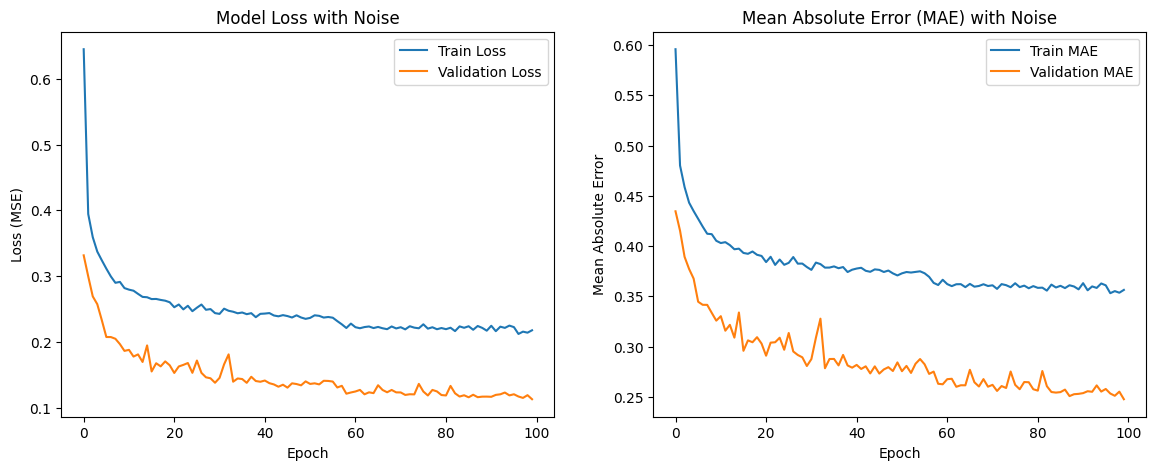

In [46]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess the data
final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Feature selection
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 
            'wind_speed_10m_max', 
            'et0_fao_evapotranspiration_sum', 
            'Season']
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]) 

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

# Adding 20% noise to the features
noise_factor = 0.0
X_noisy = X + noise_factor * X.std().values * np.random.randn(*X.shape)


# Standardize features and target variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_noisy)  # Using the noisy features
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert data to float32 for Keras
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

from tensorflow.keras.layers import GaussianNoise

model = Sequential([
    GaussianNoise(0.02, input_shape=(X_train.shape[1],)),
    Dense(32, activation='tanh'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='tanh'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1)
])

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.007775645935042448), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

# Train the model with noisy data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Plotting the loss and MAE (mean absolute error)
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Noise')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

# Plot MAE (as a measure of error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE) with Noise')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')

plt.show()


### Comparison with 2023 data

Epoch 1/100


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.0276 - mean_absolute_error: 0.7463 - val_loss: 0.4156 - val_mean_absolute_error: 0.5072 - learning_rate: 0.0078
Epoch 2/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4001 - mean_absolute_error: 0.4790 - val_loss: 0.3849 - val_mean_absolute_error: 0.5014 - learning_rate: 0.0078
Epoch 3/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3536 - mean_absolute_error: 0.4510 - val_loss: 0.3413 - val_mean_absolute_error: 0.4652 - learning_rate: 0.0078
Epoch 4/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3317 - mean_absolute_error: 0.4369 - val_loss: 0.3593 - val_mean_absolute_error: 0.4750 - learning_rate: 0.0078
Epoch 5/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3131 - mean_absolute_error: 0.4244 - val_loss: 0.3226 - val_mean_absolute_error: 0.4459 - learning_rate: 0.0078
Epoch 6/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3072 - mean_absolute_error: 0.4198 - val_loss: 0.4016 - val_mean_absolute_

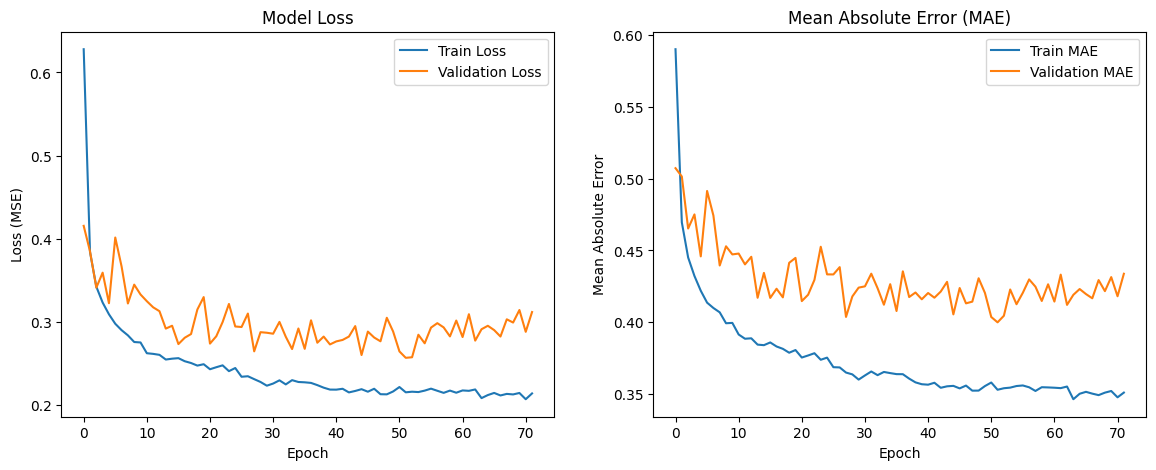

584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train RMSE: 235.1915
Test RMSE: 369.7144
Train R^2: 0.8960
Test R^2: 0.7521
Train MAE: 171.9928
Test MAE: 291.7216
Train MAPE: 4.88%
Test MAPE: 8.84%


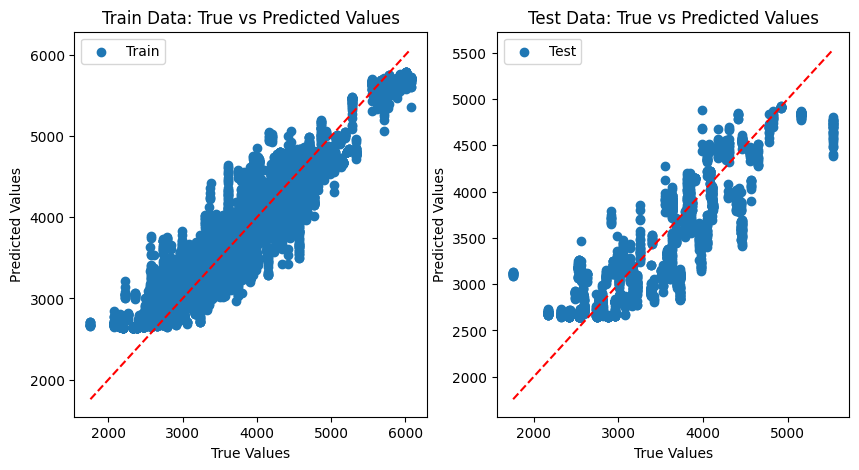

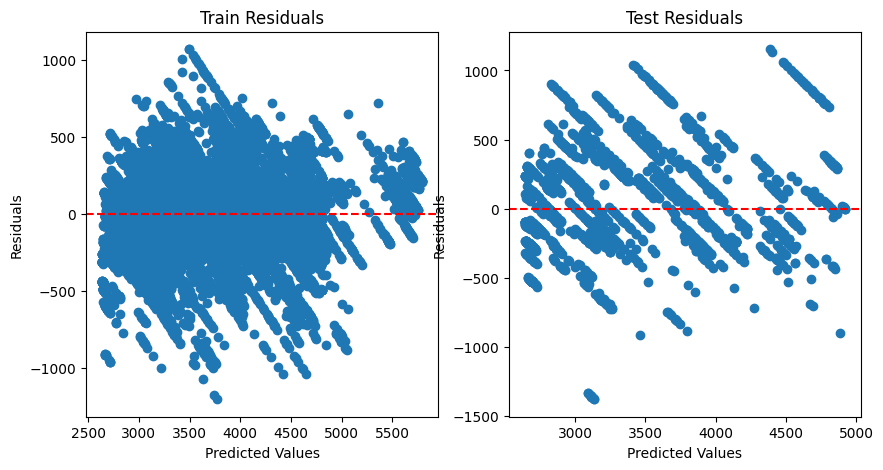

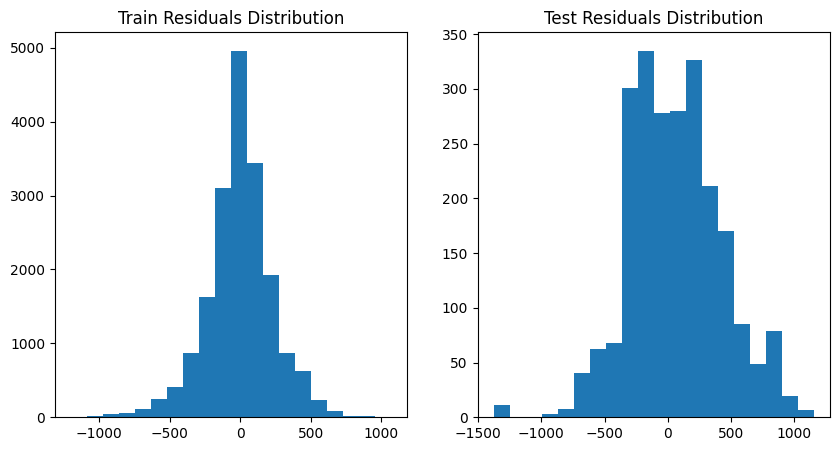

In [47]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD

final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Year can be used directly without any encoding
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 
            'wind_speed_10m_max', 
            'et0_fao_evapotranspiration_sum', 
            'Season']

# Add the one-hot encoded columns for 'District' and 'Condition'
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]) 

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

X_train = X[X['year'] != 2023]
y_train = y[X['year'] != 2023]
X_test = X[X['year'] == 2023]
y_test = y[X['year'] == 2023]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Only transform the test data

# Scale the Yield column
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Convert data to float32 for Keras
X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)
y_train_scaled = y_train_scaled.astype(np.float32)
y_test_scaled = y_test_scaled.astype(np.float32)

# Build the MLP model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(1))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.007775645935042448), loss='mean_squared_error', metrics=['mean_absolute_error'])


# Add Early Stopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled), epochs=100, batch_size=64, verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Plotting the loss and MAE (mean absolute error)
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

# Plot MAE (as a measure of error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')

plt.show()


from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the training and test data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Inverse transform the scaled predictions and true values
y_train_pred_rescaled = y_scaler.inverse_transform(y_train_pred)
y_test_pred_rescaled = y_scaler.inverse_transform(y_test_pred)

# Reshape y_train and y_test from 1D to 2D before inverse scaling
y_train_rescaled = y_scaler.inverse_transform(y_train_scaled)
y_test_rescaled = y_scaler.inverse_transform(y_test_scaled)


# Calculate RMSE for training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train_rescaled, y_train_pred_rescaled))
rmse_test = np.sqrt(mean_squared_error(y_test_rescaled, y_test_pred_rescaled))
mae_train = mean_absolute_error(y_train_rescaled, y_train_pred_rescaled)
mae_test = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)
mape_train = np.mean(np.abs((y_train_rescaled - y_train_pred_rescaled) / y_train_rescaled)) * 100
mape_test = np.mean(np.abs((y_test_rescaled - y_test_pred_rescaled) / y_test_rescaled)) * 100

# Calculate R^2 score for training and testing data
r2_train = r2_score(y_train_rescaled, y_train_pred_rescaled)
r2_test = r2_score(y_test_rescaled, y_test_pred_rescaled)

# Print evaluation results
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Train R^2: {r2_train:.4f}")
print(f"Test R^2: {r2_test:.4f}")
print(f"Train MAE: {mae_train:.4f}")
print(f"Test MAE: {mae_test:.4f}")
print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")


# Plot predictions vs true values for training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_rescaled, y_train_pred_rescaled, label='Train')
plt.plot([y_train_rescaled.min(), y_train_rescaled.max()], [y_train_rescaled.min(), y_train_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Train Data: True vs Predicted Values')
plt.legend()

# Plot predictions vs true values for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_rescaled, y_test_pred_rescaled, label='Test')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: True vs Predicted Values')
plt.legend()

plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_rescaled, y_train_rescaled - y_train_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Train Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_rescaled, y_test_rescaled - y_test_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Residuals')

plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train_rescaled - y_train_pred_rescaled, bins=20)
plt.title('Train Residuals Distribution')

plt.subplot(1, 2, 2)
plt.hist(y_test_rescaled - y_test_pred_rescaled, bins=20)
plt.title('Test Residuals Distribution')

plt.show()

### 2022- 2023 as test

Epoch 1/100


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.0484 - mean_absolute_error: 0.7527 - val_loss: 0.5441 - val_mean_absolute_error: 0.5876 - learning_rate: 0.0078
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4090 - mean_absolute_error: 0.4803 - val_loss: 0.4830 - val_mean_absolute_error: 0.5638 - learning_rate: 0.0078
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3647 - mean_absolute_error: 0.4555 - val_loss: 0.6109 - val_mean_absolute_error: 0.6357 - learning_rate: 0.0078
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3151 - mean_absolute_error: 0.4246 - val_loss: 0.4788 - val_mean_absolute_error: 0.5535 - learning_rate: 0.0078
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3020 - mean_absolute_error: 0.4187 - val_loss: 0.5595 - val_mean_absolute_error: 0.5971 - learning_rate: 0.0078
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2990 - mean_absolute_error: 0.4141 - val_loss: 0.4704 - val_mean_absolute_

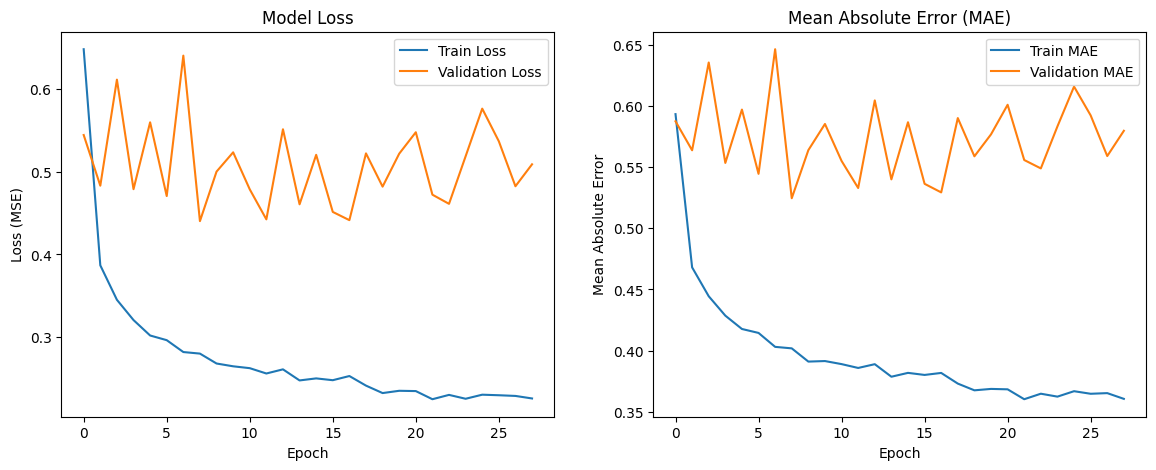

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train RMSE: 302.3389
Test RMSE: 471.0199
Train R^2: 0.8186
Test R^2: 0.5615
Train MAE: 226.6161
Test MAE: 372.4301
Train MAPE: 6.10%
Test MAPE: 12.66%


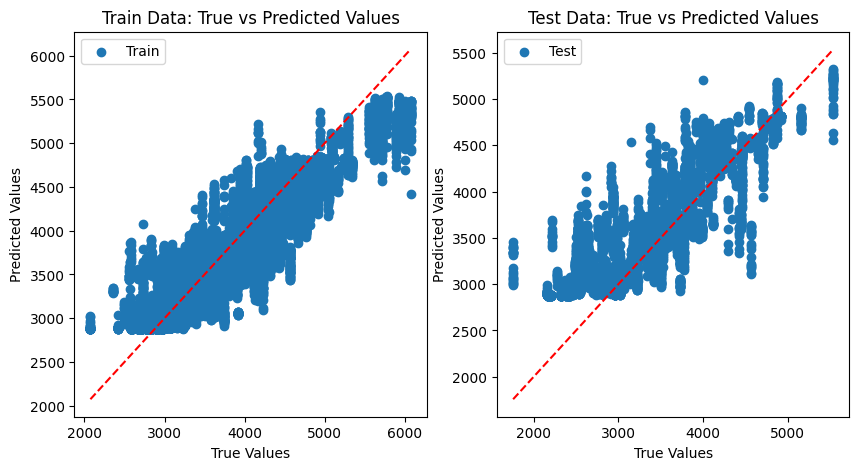

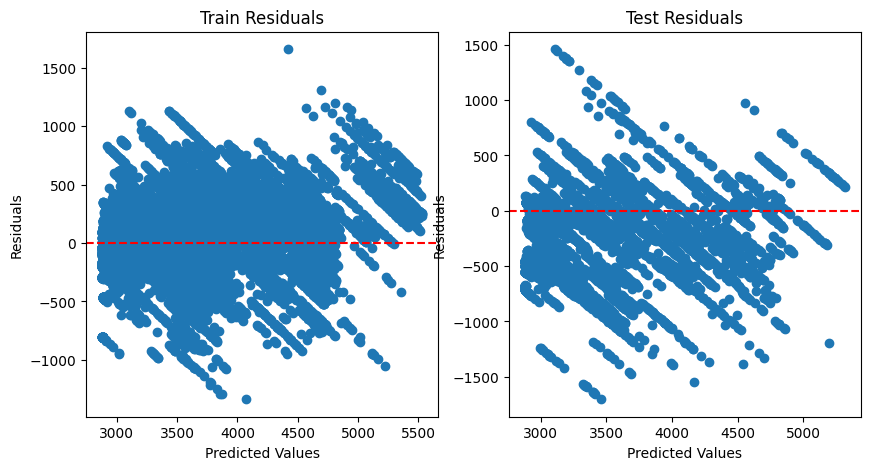

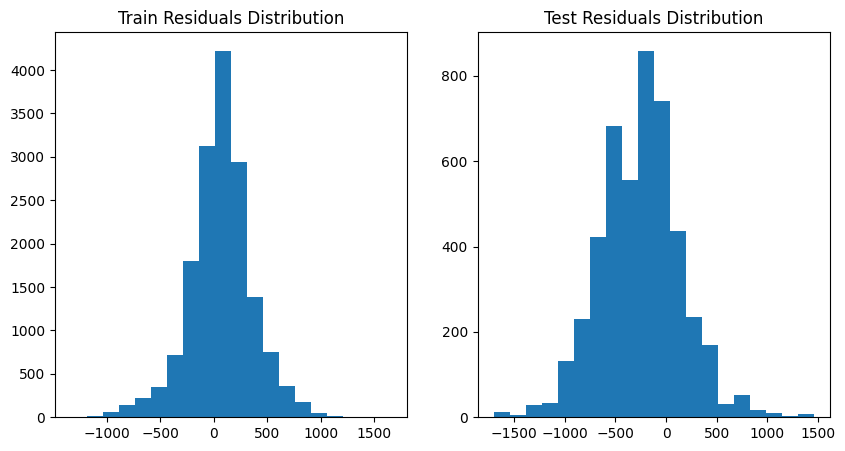

In [48]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD

final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Year can be used directly without any encoding
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 
            'wind_speed_10m_max', 
            'et0_fao_evapotranspiration_sum', 
            'Season']

# Add the one-hot encoded columns for 'District' and 'Condition'
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]) 

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

X_train = X[(X['year'] <= 2021)]
y_train = y[(X['year'] <= 2021)]
X_test = X[(X['year'] > 2021)]
y_test = y[(X['year'] > 2021)]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Only transform the test data

# Scale the Yield column
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Convert data to float32 for Keras
X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)
y_train_scaled = y_train_scaled.astype(np.float32)
y_test_scaled = y_test_scaled.astype(np.float32)

# Build the MLP model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Dense(1))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.007775645935042448), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Add Early Stopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled), epochs=100, batch_size=64, verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Plotting the loss and MAE (mean absolute error)
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

# Plot MAE (as a measure of error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')

plt.show()


from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the training and test data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Inverse transform the scaled predictions and true values
y_train_pred_rescaled = y_scaler.inverse_transform(y_train_pred)
y_test_pred_rescaled = y_scaler.inverse_transform(y_test_pred)

# Reshape y_train and y_test from 1D to 2D before inverse scaling
y_train_rescaled = y_scaler.inverse_transform(y_train_scaled)
y_test_rescaled = y_scaler.inverse_transform(y_test_scaled)


# Calculate RMSE for training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train_rescaled, y_train_pred_rescaled))
rmse_test = np.sqrt(mean_squared_error(y_test_rescaled, y_test_pred_rescaled))
mae_train = mean_absolute_error(y_train_rescaled, y_train_pred_rescaled)
mae_test = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)
mape_train = np.mean(np.abs((y_train_rescaled - y_train_pred_rescaled) / y_train_rescaled)) * 100
mape_test = np.mean(np.abs((y_test_rescaled - y_test_pred_rescaled) / y_test_rescaled)) * 100

# Calculate R^2 score for training and testing data
r2_train = r2_score(y_train_rescaled, y_train_pred_rescaled)
r2_test = r2_score(y_test_rescaled, y_test_pred_rescaled)

# Print evaluation results
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Train R^2: {r2_train:.4f}")
print(f"Test R^2: {r2_test:.4f}")
print(f"Train MAE: {mae_train:.4f}")
print(f"Test MAE: {mae_test:.4f}")
print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")


# Plot predictions vs true values for training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_rescaled, y_train_pred_rescaled, label='Train')
plt.plot([y_train_rescaled.min(), y_train_rescaled.max()], [y_train_rescaled.min(), y_train_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Train Data: True vs Predicted Values')
plt.legend()

# Plot predictions vs true values for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_rescaled, y_test_pred_rescaled, label='Test')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: True vs Predicted Values')
plt.legend()

plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_rescaled, y_train_rescaled - y_train_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Train Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_rescaled, y_test_rescaled - y_test_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Residuals')

plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train_rescaled - y_train_pred_rescaled, bins=20)
plt.title('Train Residuals Distribution')

plt.subplot(1, 2, 2)
plt.hist(y_test_rescaled - y_test_pred_rescaled, bins=20)
plt.title('Test Residuals Distribution')

plt.show()

### add layer

Epoch 1/100


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.1452 - mean_absolute_error: 0.7798 - val_loss: 0.6096 - val_mean_absolute_error: 0.6367 - learning_rate: 0.0078
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4039 - mean_absolute_error: 0.4807 - val_loss: 0.5723 - val_mean_absolute_error: 0.6167 - learning_rate: 0.0078
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3606 - mean_absolute_error: 0.4513 - val_loss: 0.5396 - val_mean_absolute_error: 0.5926 - learning_rate: 0.0078
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3335 - mean_absolute_error: 0.4373 - val_loss: 0.5730 - val_mean_absolute_error: 0.6108 - learning_rate: 0.0078
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3094 - mean_absolute_error: 0.4190 - val_loss: 0.5570 - val_mean_absolute_error: 0.5993 - learning_rate: 0.0078
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2982 - mean_absolute_error: 0.4126 - val_loss: 0.4650 - val_mean_absolute_

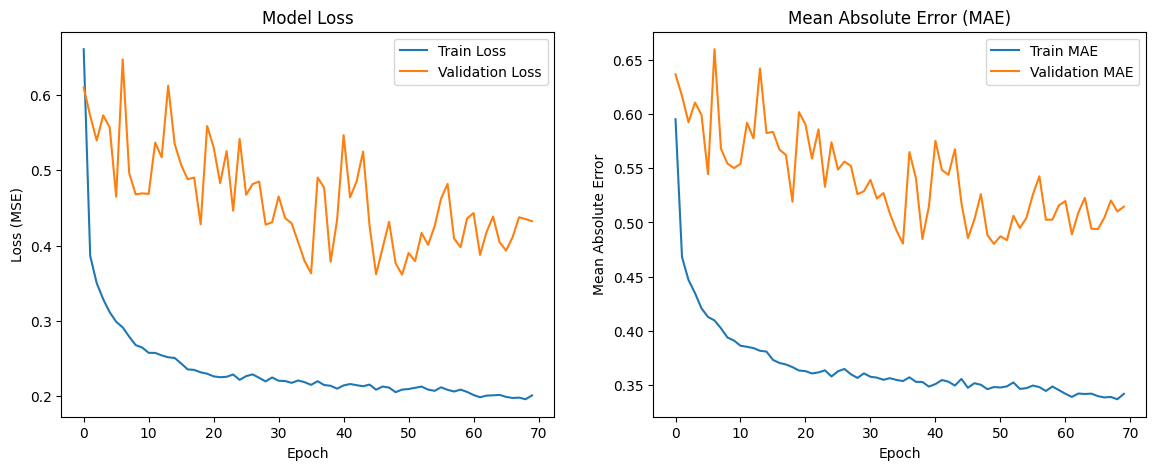

511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train RMSE: 229.0255
Test RMSE: 426.8235
Train R^2: 0.8959
Test R^2: 0.6399
Train MAE: 169.2079
Test MAE: 340.8571
Train MAPE: 4.58%
Test MAPE: 11.32%


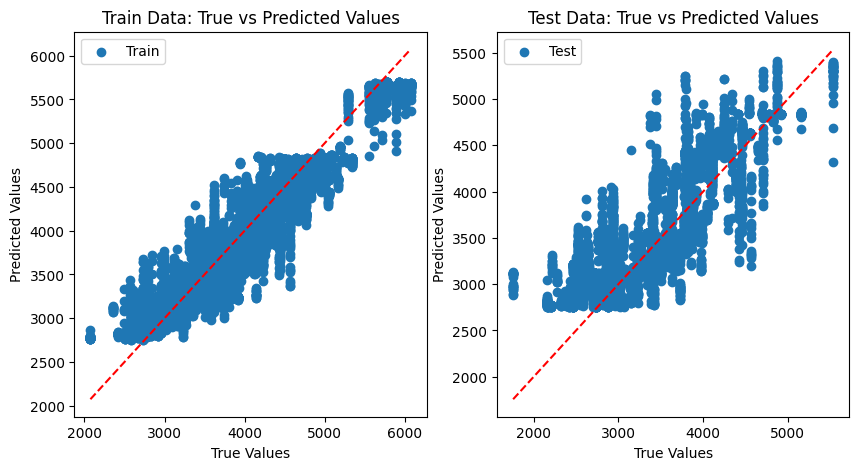

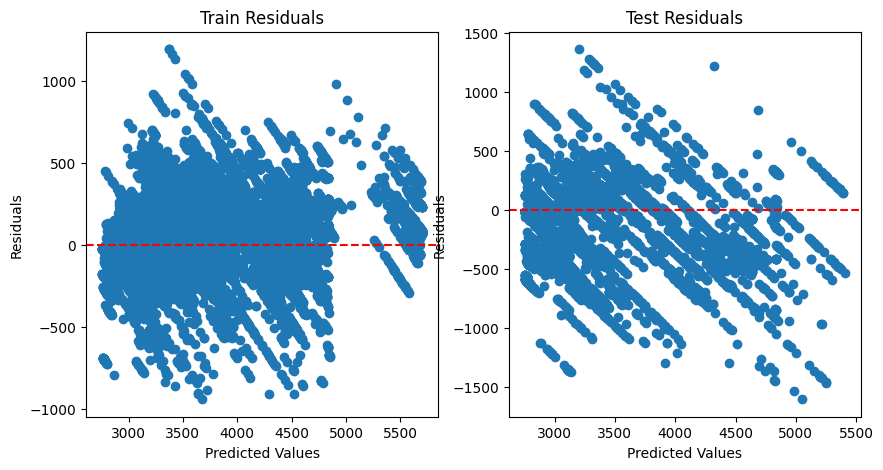

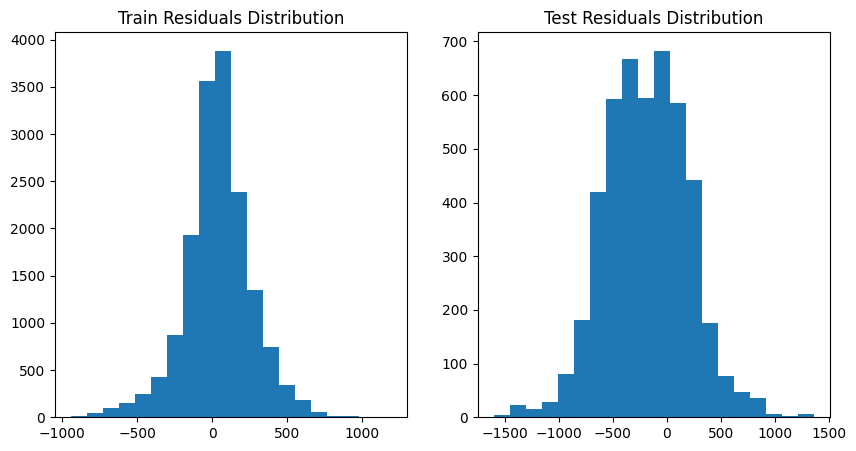

In [49]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD

final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Year can be used directly without any encoding
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 
            'wind_speed_10m_max', 
            'et0_fao_evapotranspiration_sum', 
            'Season']

# Add the one-hot encoded columns for 'District' and 'Condition'
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]) 

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

X_train = X[(X['year'] <= 2021)]
y_train = y[(X['year'] <= 2021)]
X_test = X[(X['year'] > 2021)]
y_test = y[(X['year'] > 2021)]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Only transform the test data

# Scale the Yield column
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Convert data to float32 for Keras
X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)
y_train_scaled = y_train_scaled.astype(np.float32)
y_test_scaled = y_test_scaled.astype(np.float32)

# Build the MLP model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Dense(32, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
 
model.add(Dense(1))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.007775645935042448), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Add Early Stopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled), epochs=100, batch_size=64, verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Plotting the loss and MAE (mean absolute error)
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

# Plot MAE (as a measure of error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')

plt.show()


from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the training and test data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Inverse transform the scaled predictions and true values
y_train_pred_rescaled = y_scaler.inverse_transform(y_train_pred)
y_test_pred_rescaled = y_scaler.inverse_transform(y_test_pred)

# Reshape y_train and y_test from 1D to 2D before inverse scaling
y_train_rescaled = y_scaler.inverse_transform(y_train_scaled)
y_test_rescaled = y_scaler.inverse_transform(y_test_scaled)


# Calculate RMSE for training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train_rescaled, y_train_pred_rescaled))
rmse_test = np.sqrt(mean_squared_error(y_test_rescaled, y_test_pred_rescaled))
mae_train = mean_absolute_error(y_train_rescaled, y_train_pred_rescaled)
mae_test = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)
mape_train = np.mean(np.abs((y_train_rescaled - y_train_pred_rescaled) / y_train_rescaled)) * 100
mape_test = np.mean(np.abs((y_test_rescaled - y_test_pred_rescaled) / y_test_rescaled)) * 100

# Calculate R^2 score for training and testing data
r2_train = r2_score(y_train_rescaled, y_train_pred_rescaled)
r2_test = r2_score(y_test_rescaled, y_test_pred_rescaled)

# Print evaluation results
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Train R^2: {r2_train:.4f}")
print(f"Test R^2: {r2_test:.4f}")
print(f"Train MAE: {mae_train:.4f}")
print(f"Test MAE: {mae_test:.4f}")
print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")


# Plot predictions vs true values for training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_rescaled, y_train_pred_rescaled, label='Train')
plt.plot([y_train_rescaled.min(), y_train_rescaled.max()], [y_train_rescaled.min(), y_train_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Train Data: True vs Predicted Values')
plt.legend()

# Plot predictions vs true values for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_rescaled, y_test_pred_rescaled, label='Test')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: True vs Predicted Values')
plt.legend()

plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_rescaled, y_train_rescaled - y_train_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Train Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_rescaled, y_test_rescaled - y_test_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Residuals')

plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train_rescaled - y_train_pred_rescaled, bins=20)
plt.title('Train Residuals Distribution')

plt.subplot(1, 2, 2)
plt.hist(y_test_rescaled - y_test_pred_rescaled, bins=20)
plt.title('Test Residuals Distribution')

plt.show()

### Excluding 2021+

Epoch 1/100


d:\Projects\CDP\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.4341 - mean_absolute_error: 0.9124 - val_loss: 0.5978 - val_mean_absolute_error: 0.5564 - learning_rate: 0.0078
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4656 - mean_absolute_error: 0.5170 - val_loss: 0.5699 - val_mean_absolute_error: 0.5504 - learning_rate: 0.0078
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4001 - mean_absolute_error: 0.4768 - val_loss: 0.4927 - val_mean_absolute_error: 0.5066 - learning_rate: 0.0078
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3818 - mean_absolute_error: 0.4650 - val_loss: 0.4403 - val_mean_absolute_error: 0.4791 - learning_rate: 0.0078
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3702 - mean_absolute_error: 0.4596 - val_loss: 0.4992 - val_mean_absolute_error: 0.5257 - learning_rate: 0.0078
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3381 - mean_absolute_error: 0.4436 - val_loss: 0.4332 - val_mean_absolute_

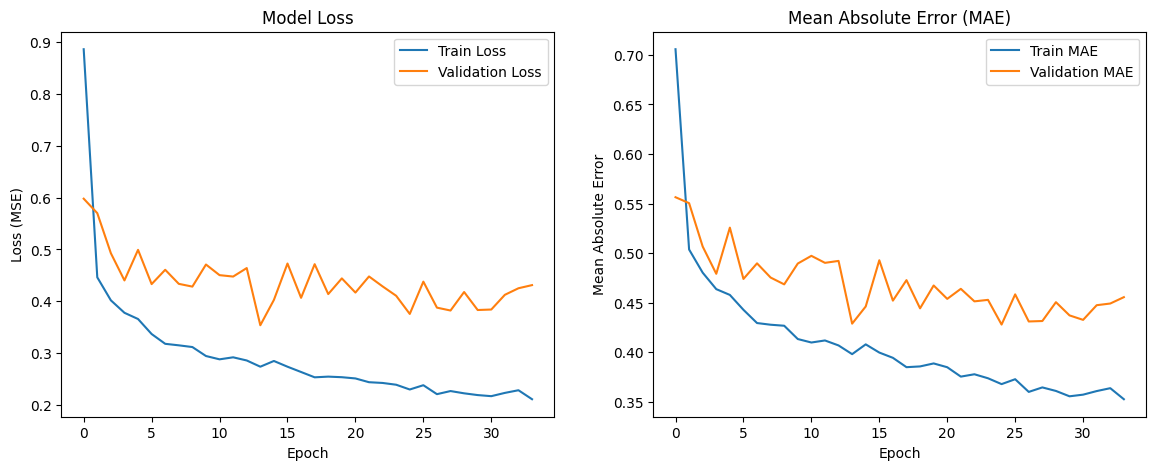

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train RMSE: 282.1308
Test RMSE: 408.1264
Train R^2: 0.8308
Test R^2: 0.6772
Train MAE: 209.2988
Test MAE: 294.1371
Train MAPE: 5.78%
Test MAPE: 7.46%


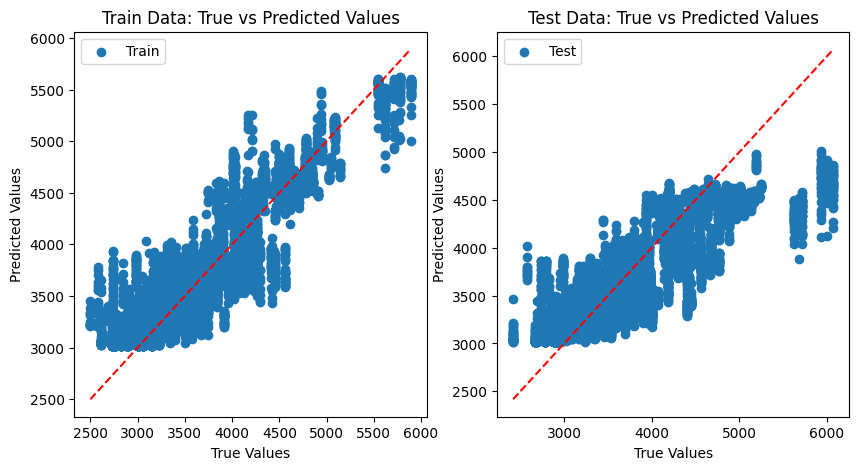

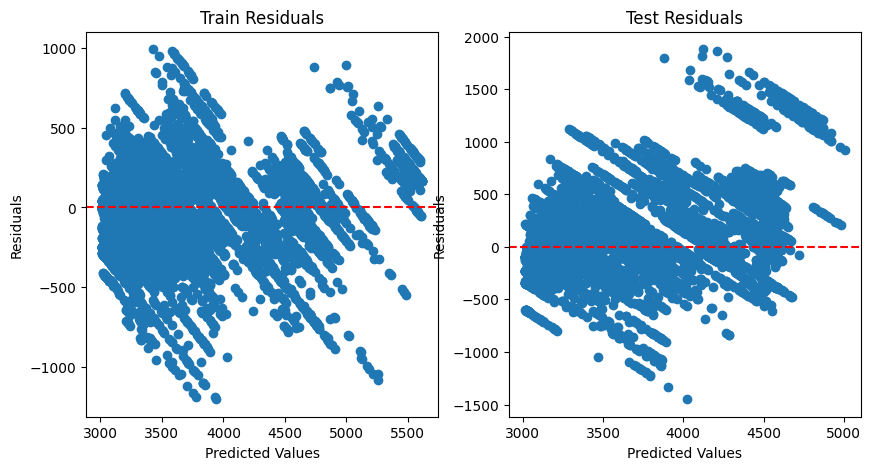

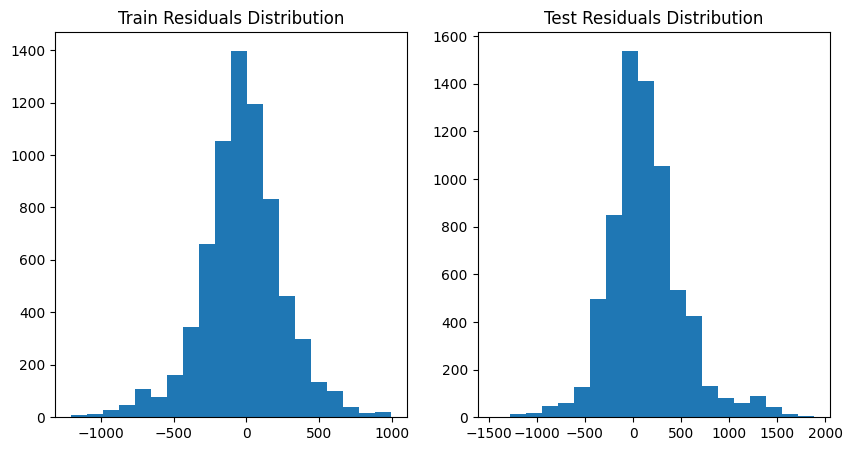

In [50]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam, SGD

final_combined_data_cleaned = pd.read_excel('6. final_dataset.xlsx')
final_combined_data_cleaned['Phosphorus'] = np.log1p(final_combined_data_cleaned['Phosphorus'])
final_combined_data_cleaned['Potassium'] = np.log1p(final_combined_data_cleaned['Potassium'])
final_combined_data_cleaned['OM'] = np.log1p(final_combined_data_cleaned['OM'])
final_combined_data_cleaned['EC'] = np.log1p(final_combined_data_cleaned['EC'])
final_combined_data_cleaned['temperature_2m_max'] = np.cbrt(final_combined_data_cleaned['temperature_2m_max'])
final_combined_data_cleaned['temperature_2m_min'] = np.cbrt(final_combined_data_cleaned['temperature_2m_min'])
final_combined_data_cleaned['rain_sum'] = np.cbrt(final_combined_data_cleaned['rain_sum'])
final_combined_data_cleaned['sunshine_duration'] = np.cbrt(final_combined_data_cleaned['sunshine_duration'])
final_combined_data_cleaned['wind_speed_10m_max'] = np.cbrt(final_combined_data_cleaned['wind_speed_10m_max'])
final_combined_data_cleaned['et0_fao_evapotranspiration_sum'] = np.cbrt(final_combined_data_cleaned['et0_fao_evapotranspiration_sum'])

label_encoder = LabelEncoder()
final_combined_data_cleaned['Season'] = label_encoder.fit_transform(final_combined_data_cleaned['season'])

final_combined_data_encoded = pd.get_dummies(final_combined_data_cleaned, columns=['Condition'])

# Year can be used directly without any encoding
features = ['year', 'pH', 'EC', 'Phosphorus', 'Potassium', 'OM', 
            'Urea1', 'Urea2', 'Urea3', 'Urea4', 
            'TSP0', 'MOP1', 'MOP2', 'MOP3', 
            'temperature_2m_max', 'temperature_2m_min', 
            'sunshine_duration', 'rain_sum', 
            'wind_speed_10m_max', 
            'et0_fao_evapotranspiration_sum', 
            'Season']

# Add the one-hot encoded columns for 'District' and 'Condition'
features.extend([col for col in final_combined_data_encoded.columns if col.startswith('Condition_')]) 

X = final_combined_data_encoded[features]
y = final_combined_data_encoded['Yield']

X_train = X[(X['year'] < 2018)]
y_train = y[(X['year'] < 2018)]
X_test = X[(X['year'] >= 2018) & (X['year'] <= 2020)]
y_test = y[(X['year'] >= 2018) & (X['year'] <= 2020)]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Only transform the test data

# Scale the Yield column
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Convert data to float32 for Keras
X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)
y_train_scaled = y_train_scaled.astype(np.float32)
y_test_scaled = y_test_scaled.astype(np.float32)

# Build the MLP model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(32, activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Dense(1))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.007775645935042448), loss='mean_squared_error', metrics=['mean_absolute_error'])

# Add Early Stopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7)

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled), epochs=100, batch_size=64, verbose=1,
                    callbacks=[early_stopping, reduce_lr])

# Plotting the loss and MAE (mean absolute error)
plt.figure(figsize=(14, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

# Plot MAE (as a measure of error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')

plt.show()


from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the training and test data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Inverse transform the scaled predictions and true values
y_train_pred_rescaled = y_scaler.inverse_transform(y_train_pred)
y_test_pred_rescaled = y_scaler.inverse_transform(y_test_pred)

# Reshape y_train and y_test from 1D to 2D before inverse scaling
y_train_rescaled = y_scaler.inverse_transform(y_train_scaled)
y_test_rescaled = y_scaler.inverse_transform(y_test_scaled)


# Calculate RMSE for training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train_rescaled, y_train_pred_rescaled))
rmse_test = np.sqrt(mean_squared_error(y_test_rescaled, y_test_pred_rescaled))
mae_train = mean_absolute_error(y_train_rescaled, y_train_pred_rescaled)
mae_test = mean_absolute_error(y_test_rescaled, y_test_pred_rescaled)
mape_train = np.mean(np.abs((y_train_rescaled - y_train_pred_rescaled) / y_train_rescaled)) * 100
mape_test = np.mean(np.abs((y_test_rescaled - y_test_pred_rescaled) / y_test_rescaled)) * 100

# Calculate R^2 score for training and testing data
r2_train = r2_score(y_train_rescaled, y_train_pred_rescaled)
r2_test = r2_score(y_test_rescaled, y_test_pred_rescaled)

# Print evaluation results
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Train R^2: {r2_train:.4f}")
print(f"Test R^2: {r2_test:.4f}")
print(f"Train MAE: {mae_train:.4f}")
print(f"Test MAE: {mae_test:.4f}")
print(f"Train MAPE: {mape_train:.2f}%")
print(f"Test MAPE: {mape_test:.2f}%")


# Plot predictions vs true values for training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_rescaled, y_train_pred_rescaled, label='Train')
plt.plot([y_train_rescaled.min(), y_train_rescaled.max()], [y_train_rescaled.min(), y_train_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Train Data: True vs Predicted Values')
plt.legend()

# Plot predictions vs true values for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_rescaled, y_test_pred_rescaled, label='Test')
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Test Data: True vs Predicted Values')
plt.legend()

plt.show()


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred_rescaled, y_train_rescaled - y_train_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Train Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test_pred_rescaled, y_test_rescaled - y_test_pred_rescaled)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Test Residuals')

plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train_rescaled - y_train_pred_rescaled, bins=20)
plt.title('Train Residuals Distribution')

plt.subplot(1, 2, 2)
plt.hist(y_test_rescaled - y_test_pred_rescaled, bins=20)
plt.title('Test Residuals Distribution')

plt.show()

###